# Intro
Based on the given dataset, we will focus on heart disease classification. This dataset contains a number of important health features, such as age, gender, blood pressure, cholesterol, maximum heart rate, and ECG test results, which will be used to predict whether a person is at risk of developing heart disease or not (marked by the "target" column)

The goal of this assignment is to build a classification model that is able to predict with high accuracy whether a person is at risk of developing heart disease. With this model, healthcare services can improve early detection and take better preventive measures to reduce the risk of heart disease in the population

# Description About This Dataset
age: Age of the patient (in years)

sex: Sex of the patient (1 = male, 0 = female)

cp: Chest pain type (1-4)

trestbps: Resting blood pressure (in mm Hg on admission to the hospital)

chol: Serum cholesterol (in mg/dl)

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: Resting electrocardiographic results (0-2)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: refers to the slope of the ST segment on an ECG (0: downsloping, 1: flat, 2: upsloping)

ca: the number of major vessels colored by fluoroscopy that are blocked (0-3)

thal: thalassemia condition (1: normal, 2: fixed detect, 3: reversible defect)

target: the status of a person has heart disease or not(0: No heart disease, 1: Has heart disease)

# DATA PREPROCESSING & HANDLING MISSING VALUES

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

c:\Users\Jeremy Djohar Riyadi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Read File and Show The First Five Rows

In [2]:
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### View Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Count Missing Value

In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


There is no missing data in this dataset

### Describing the Dataset

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

### Outlier Check

In [3]:
# Converting categorical variables from numeric to categorical
data_encode = {"sex": {1: "male", 0: "female"},
                "fbs": {1: ">120mg/dl", 0: "<=120mg/dl"},
                "exang": {1: "yes", 0: "no"}
                }

df = data.replace(data_encode)

Converting numeric variables to categorical using encoding method

In [8]:
# Checking Outliers in numeric variables with boxplot
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
  fig = px.box(df, y=col, title=f'Boxplot of {col}', labels={col: f'{col.capitalize()}'})
  fig.update_layout(
        width=800,
        height=500,
        xaxis_tickangle=0
    )
  fig.show()

Visualizing numeric data using boxplots to check for outliers

### Categorical Distribution

In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    fig = px.histogram(df, x=col, title=f'Histogram of {col}',
                      labels={col: f'{col.capitalize()}'})
    fig.update_layout(
        width=800,
        height=500,
        xaxis_tickangle=0
    )
    fig.show()

Visualizing the distribution of categorical variables

## Correlation Test

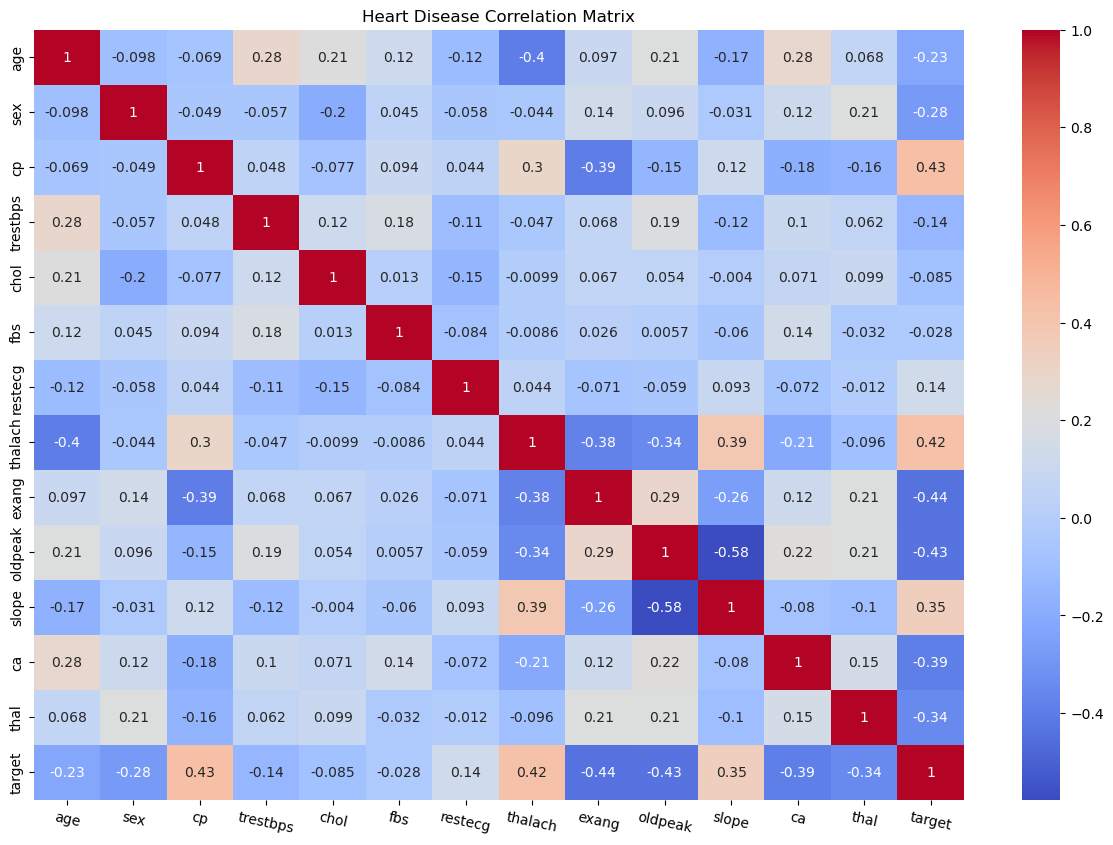

In [9]:
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heart Disease Correlation Matrix')
plt.xticks(rotation=-12)
plt.show()

Create a Heatmap to show the correlation between each variable

### Highest Correlation Between cp and target


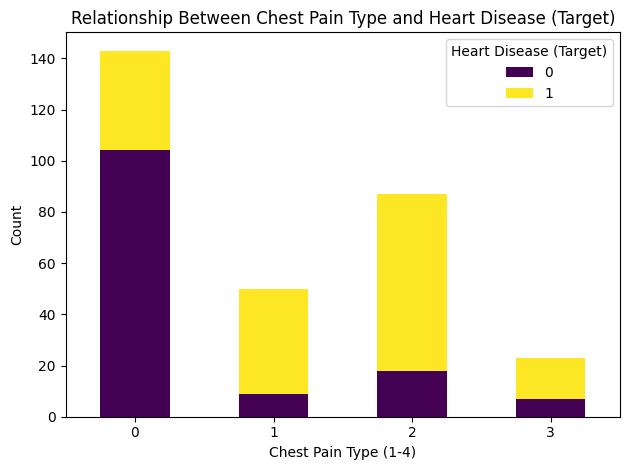

In [20]:
cp_target_crosstab = pd.crosstab(data['cp'], data['target'])

# Plot the stacked bar chart
cp_target_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship Between Chest Pain Type and Heart Disease (Target)')
plt.xlabel('Chest Pain Type (1-4)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (Target)', loc='upper right')
plt.xticks(rotation=0)

# adjust spacing
plt.tight_layout()
plt.show()

Shows the highest correlation between cp and target using a stacked bar plot

### Lowest Correlation Between slope and oldpeak

<ipython-input-6-f755bcbacf43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='slope', y='oldpeak', data=data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a

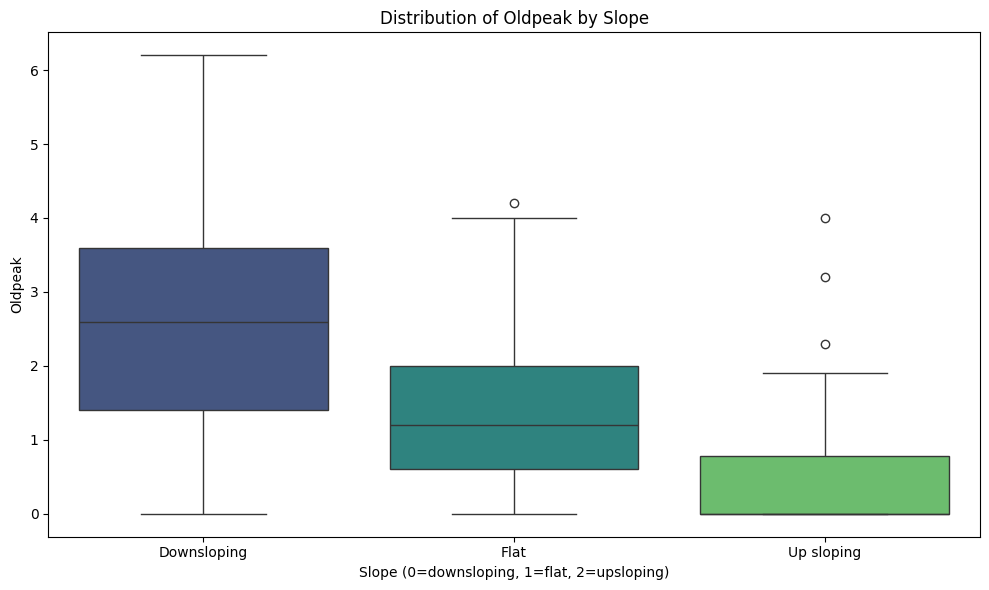

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='slope', y='oldpeak', data=data, palette='viridis')

plt.title('Distribution of Oldpeak by Slope')
plt.xlabel('Slope (0=downsloping, 1=flat, 2=upsloping)')
plt.ylabel('Oldpeak')
plt.xticks(ticks=[0, 1, 2], labels=['Downsloping', 'Flat', 'Up sloping'])

plt.tight_layout()
plt.show()

Shows the lowest correlation between oldpeak and slope using boxplot

## Univariate

In [11]:
# Distribution plot column 'age'
fig = px.histogram(data, x="age", title='Distribusi Age')
fig.update_traces(marker_line_width=1.5, marker_line_color="black")
fig.update_layout(
        width=800,
        height=500,
        xaxis_tickangle=0
)
fig.show()

In [12]:
# Distribution plot column 'trestbps'
fig = px.histogram(data, x="trestbps", title='Distribusi trestbps')
fig.update_traces(marker_line_width=1.5, marker_line_color="black")
fig.update_layout(
        width=800,
        height=500,
        xaxis_tickangle=0
)
fig.show()

In [13]:
# Distribution plot column 'chol'
fig = px.histogram(data, x="chol", title='Distribusi chol')
fig.update_traces(marker_line_width=1.5, marker_line_color="black")
fig.update_layout(
        width=800,
        height=500,
        xaxis_tickangle=0
)
fig.show()

In [14]:
# Distribution plot column 'thalach'
fig = px.histogram(data, x="thalach", title='Distribusi thalach')
fig.update_traces(marker_line_width=1.5, marker_line_color="black")
fig.update_layout(
        width=800,
        height=500,
        xaxis_tickangle=0
)
fig.show()

## Bivariate

<ipython-input-12-7127e66109b4>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

Se

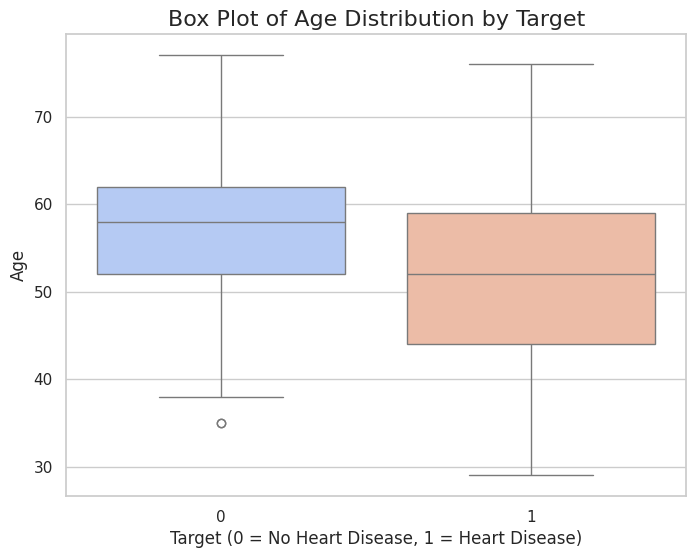

In [ ]:
# Age and Target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=data, palette='coolwarm')
plt.title('Box Plot of Age Distribution by Target', fontsize=16)
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

Visualizing the correlation between target and age columns using boxplot

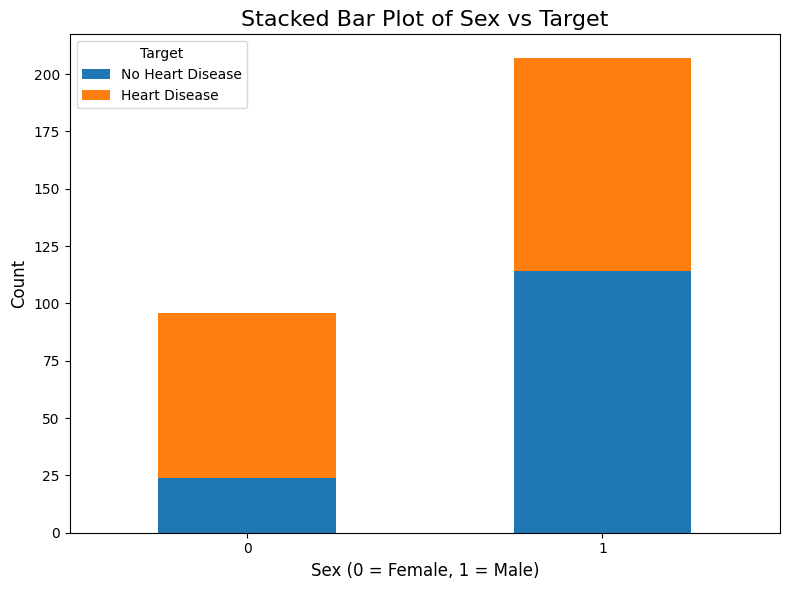

In [ ]:
# Sex and Target
sex_target_counts = data.groupby(['sex', 'target']).size().unstack()

sex_target_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))

plt.title('Stacked Bar Plot of Sex vs Target', fontsize=16)
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

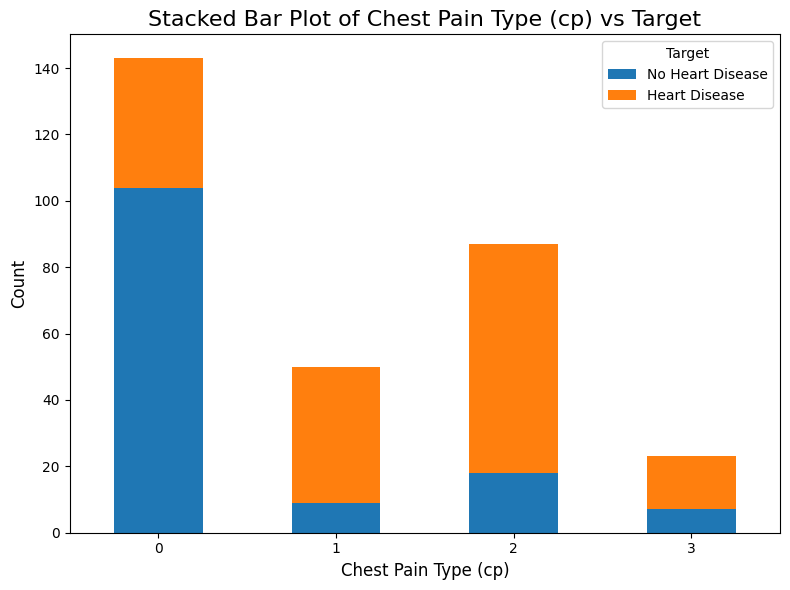

In [ ]:
# cp and target

cp_target_counts = data.groupby(['cp', 'target']).size().unstack()
cp_target_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Stacked Bar Plot of Chest Pain Type (cp) vs Target', fontsize=16)
plt.xlabel('Chest Pain Type (cp)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

<ipython-input-8-807bd24754a3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='trestbps', data=data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group i

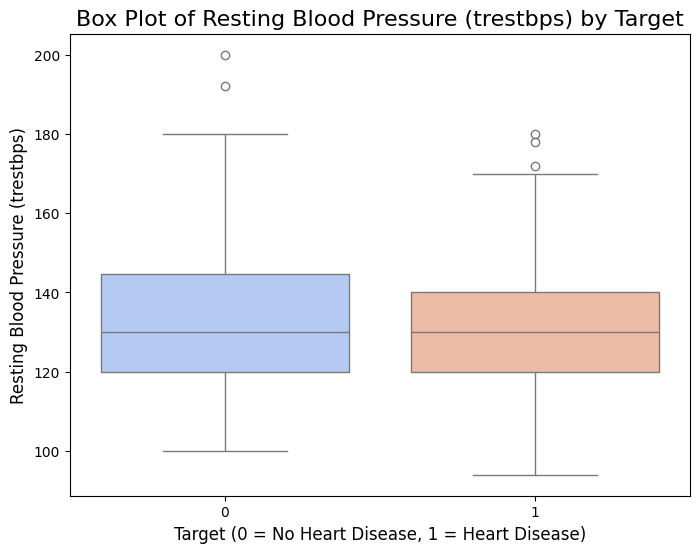

In [ ]:
# trestbps and target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='trestbps', data=data, palette='coolwarm')
plt.title('Box Plot of Resting Blood Pressure (trestbps) by Target', fontsize=16)
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)', fontsize=12)
plt.ylabel('Resting Blood Pressure (trestbps)', fontsize=12)
plt.show()

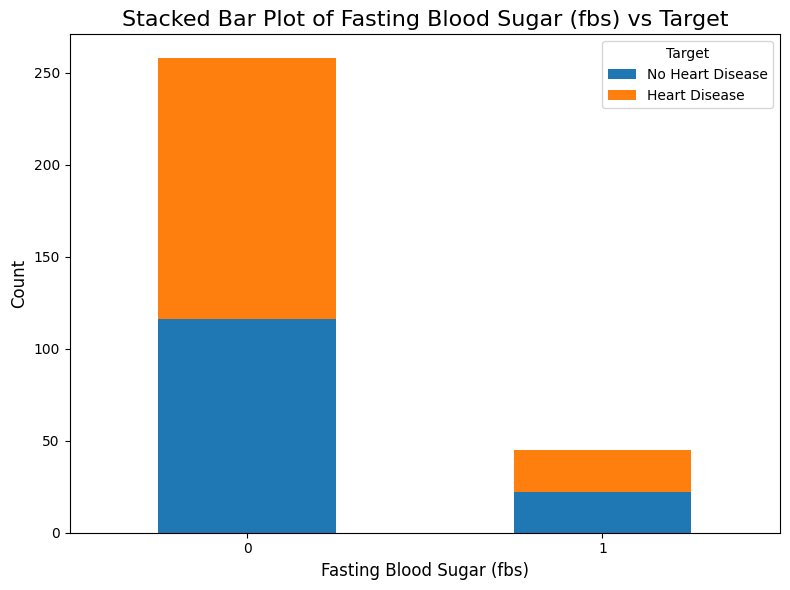

In [ ]:
# fbs and target

fbs_target_counts = data.groupby(['fbs', 'target']).size().unstack()
fbs_target_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Stacked Bar Plot of Fasting Blood Sugar (fbs) vs Target', fontsize=16)
plt.xlabel('Fasting Blood Sugar (fbs)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

Memvisualisasikan korelasi antara kolom fbs dan target menggunakan stacked bar plot

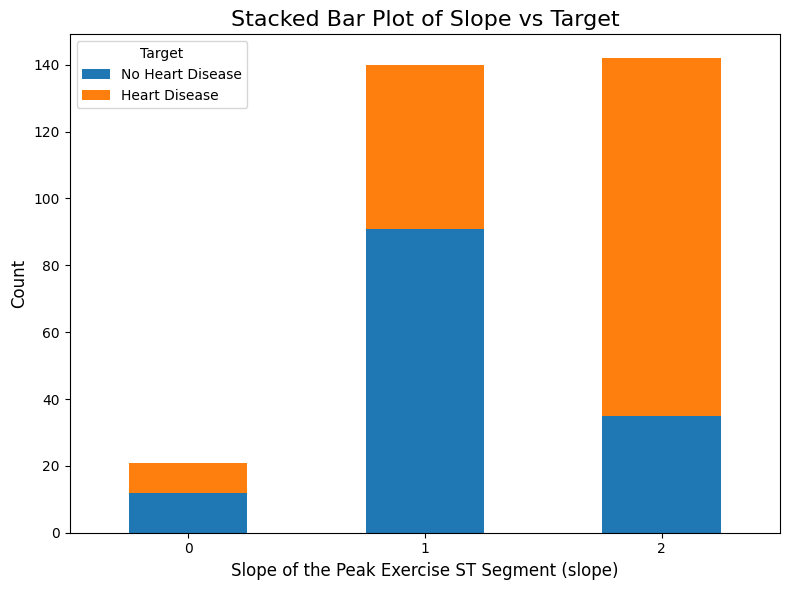

In [ ]:
# slope and target
slope_target_counts = data.groupby(['slope', 'target']).size().unstack()
slope_target_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Stacked Bar Plot of Slope vs Target', fontsize=16)
plt.xlabel('Slope of the Peak Exercise ST Segment (slope)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

Visualizing the correlation between slope and target columns using a stacked bar plot

# Data Splitting

In [3]:
input = data.drop('target', axis=1)
output = data['target']

Separating data for input and output, input is the data that we will predict while output is all other data apart from the data that we predict

In [4]:
# Split classification dataset
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(input, output, test_size = 0.2, random_state = 0)

print(f'\ntrain data for classification: ', x_train1.shape)
print('test data for classification: ', x_test1.shape)


train data for classification:  (242, 13)
test data for classification:  (61, 13)


In [5]:
x_train1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [ ]:
x_test1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3


In [ ]:
y_train1

,target
74,1
153,1
64,1
296,0
287,0
...,...
251,0
192,0
117,1
47,1


In [ ]:
y_test1

,target
225,0
152,1
228,0
201,0
52,1
...,...
146,1
302,0
26,1
108,1


# Classification KNN

In [6]:
# Import Libraries
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

## K - value 2

In [7]:
KNN_class_2 = KNeighborsClassifier(n_neighbors=2, weights='uniform')
KNN_class_2.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=2)

In [8]:
y_predict = KNN_class_2.predict(x_test1)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [9]:
print('\nClassification KNN (2)\n')
print(classification_report(y_test1, y_predict, target_names=['1','2']))

report4 = classification_report(y_test1, y_predict, output_dict=True)
weighted_avg_precision4 = report4['weighted avg']['precision']
weighted_avg_recall4 = report4['weighted avg']['recall']
weighted_avg_f1_score4 = report4['weighted avg']['f1-score']


Classification KNN (2)

              precision    recall  f1-score   support

           1       0.54      0.78      0.64        27
           2       0.73      0.47      0.57        34

    accuracy                           0.61        61
   macro avg       0.63      0.62      0.60        61
weighted avg       0.64      0.61      0.60        61



**Class 1**

Precision: 0.54 → Out of all predictions for class 1, 54% were correct

Recall: 0.78 → Out of all the actual data that belonged to class 1, the model correctly identified 78%

F1-score: 0.64 → This is the balance between precision and recall for class 1

Support: 27 → There are 27 samples that actually belong to class 1

**Class 2**

Precision: 0.73 → Out of all predictions for class 2, 73% were correct

Recall: 0.47 → Out of all the actual data that belonged to class 2, the model correctly identified 47%

F1-score: 0.57 → This is the balance between precision and recall for class 2

Support: 34 → There are 34 samples that actually belong to class 2

## K - value 20

In [ ]:
KNN_class_20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
KNN_class_20.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_predict = KNN_class_20.predict(x_test1)
y_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print('\nClassification KNN (20)\n')
print(classification_report(y_test1, y_predict, target_names=['1','2']))

report4 = classification_report(y_test1, y_predict, output_dict=True)
weighted_avg_precision4 = report4['weighted avg']['precision']
weighted_avg_recall4 = report4['weighted avg']['recall']
weighted_avg_f1_score4 = report4['weighted avg']['f1-score']


Classification KNN (20)

              precision    recall  f1-score   support

           1       0.74      0.63      0.68        27
           2       0.74      0.82      0.78        34

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.73        61



**Class 1**

Precision: 0.74 → Of all the predictions for class 1, 74% were correct

Recall: 0.63 → Of all the actual data that belonged to class 1, the model correctly identified 63%

F1-score: 0.68 → This is the balance between precision and recall for class 1

Support: 27 → There are 27 samples that actually belong to class 1

**Class 2**

Precision: 0.74 → Of all the predictions for class 2, 74% were correct

Recall: 0.82 → Of all the actual data that belonged to class 2, the model correctly identified 82%

F1-score: 0.78 → This is the balance between precision and recall for class 2

Support: 34 → There are 34 samples that actually belong to class 2 in class 1

## K - value 70

In [ ]:
KNN_class_70 = KNeighborsClassifier(n_neighbors=70, weights='uniform')
KNN_class_70.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=70)

In [ ]:
y_predict = KNN_class_70.predict(x_test1)
y_predict

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
print('\nClassification KNN (70)\n')
print(classification_report(y_test1, y_predict, target_names=['1','2']))

report4 = classification_report(y_test1, y_predict, output_dict=True)
weighted_avg_precision4 = report4['weighted avg']['precision']
weighted_avg_recall4 = report4['weighted avg']['recall']
weighted_avg_f1_score4 = report4['weighted avg']['f1-score']


Classification KNN (70)

              precision    recall  f1-score   support

           1       0.75      0.44      0.56        27
           2       0.67      0.88      0.76        34

    accuracy                           0.69        61
   macro avg       0.71      0.66      0.66        61
weighted avg       0.70      0.69      0.67        61



**Class 1**

Precision: 0.75 → Of all the predictions for class 1, 75% are correct

Recall: 0.44 → Of all the actual data that fall into class 1, the model correctly identifies 44%

F1-score: 0.56 → This is the balance between precision and recall for class 1

Support: 27 → There are 27 samples that actually fall into class 1

**Class 2**

Precision: 0.67 → Of all the predictions for class 2, 67% are correct

Recall: 0.88 → Of all the actual data that fall into class 2, the model correctly identifies 88%

F1-score: 0.76 → This is the balance between precision and recall for class 2

Support: 34 → There are 34 samples that truly belongs to class 1

## K - value 150

In [ ]:
KNN_class_150 = KNeighborsClassifier(n_neighbors=150, weights='uniform')
KNN_class_150.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=150)

In [ ]:
y_predict = KNN_class_150.predict(x_test1)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print('\nClassification KNN (150)\n')
print(classification_report(y_test1, y_predict, target_names=['1','2']))

report4 = classification_report(y_test1, y_predict, output_dict=True)
weighted_avg_precision4 = report4['weighted avg']['precision']
weighted_avg_recall4 = report4['weighted avg']['recall']
weighted_avg_f1_score4 = report4['weighted avg']['f1-score']


Classification KNN (100)

              precision    recall  f1-score   support

           1       0.90      0.33      0.49        27
           2       0.65      0.97      0.78        34

    accuracy                           0.69        61
   macro avg       0.77      0.65      0.63        61
weighted avg       0.76      0.69      0.65        61



**Class 1**

Precision: 0.90 → Of all the predictions for class 1, 90% are correct

Recall: 0.33 → Of all the actual data that fall into class 1, the model correctly identifies 33%

F1-score: 0.49 → This is the balance between precision and recall for class 1

Support: 27 → There are 27 samples that actually fall into class 1

**Class 2**

Precision: 0.65 → Of all the predictions for class 2, 65% are correct

Recall: 0.97 → Of all the actual data that fall into class 2, the model correctly identifies 97%

F1-score: 0.78 → This is the balance between precision and recall for class 2

Support: 34 → There are 34 samples that truly belongs to class 1

# Tuning Parameter Using GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'n_neighbors':list(range(5,90)),
    'weights':['uniform','distance'],
}

In [12]:
KNN_class = KNeighborsClassifier()
KNN_class= GridSearchCV(KNN_class ,
                            param_grid = hyperparameters,
                            scoring='accuracy',
                            cv=5)

In [13]:
KNN_class.fit(x_train1,y_train1)
print("Tuned Hyperparameters :", KNN_class.best_params_)
print("Accuracy :",KNN_class.best_score_)

Tuned Hyperparameters : {'n_neighbors': 10, 'weights': 'distance'}
Accuracy : 0.6738945578231292


In [14]:
KNN_class_10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
KNN_class_10.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=10)

In [15]:
y_predict = KNN_class_10.predict(x_test1)
y_predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [21]:
print('\nClassification KNN (10)\n')
print(classification_report(y_test1, y_predict, target_names=['1','2']))

report4 = classification_report(y_test1, y_predict, output_dict=True)
weighted_avg_precision4 = report4['weighted avg']['precision']
weighted_avg_recall4 = report4['weighted avg']['recall']
weighted_avg_f1_score4 = report4['weighted avg']['f1-score']


Classification KNN (10)

              precision    recall  f1-score   support

           1       0.59      0.70      0.64        27
           2       0.72      0.62      0.67        34

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.67      0.66      0.66        61



**Class 1**

Precision: 0.59 → Out of all predictions for class 1, 59% are correct

Recall: 0.70 → Out of all actual data that fall into class 1, the model correctly identifies 70%

F1-score: 0.64 → This is the balance between precision and recall for class 1

Support: 27 → There are 27 samples that actually fall into class 1

**Class 2**

Precision: 0.72 → Out of all predictions for class 2, 72% are correct

Recall: 0.62 → Out of all actual data that fall into class 2, the model correctly identifies 97%

F1-score: 0.67 → This is the balance between precision and recall for class 2

Support: 34 → There are 34 samples that truly belongs to class 1